In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [201]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [35]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Amount  Class  
284802  0.943651  0.823731    0.77      0  
284803  0.068472 -0.053527   24.79      0  
284804  0.004455 -0.026561   67.88      0  
284805  0.108821  0.104533   10.00      0  
284806 -0.002415  0.013649  217.00      0

In [36]:
df.shape

(284807, 31)

In [8]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   7.092545e-13  1.874948e-12  1.053347e-12  7.127611e-13 -1.474791e-13   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -5.231558e-13 -2.282250e-13 -6.425436e-13  4.950748e-13  7.057397e-13   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.766111e-12 -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [9]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  V21  V20  V19  \
Total     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V18  V17  V15   V1  V14  V13  V12  V11  V10   V9   V8   V7   V6   V5  \
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          V4   V3   V2  Class  
Total    0.0  0.0  0.0    0.0  
Percent  0.0  0.0  0.0    0.0

In [11]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

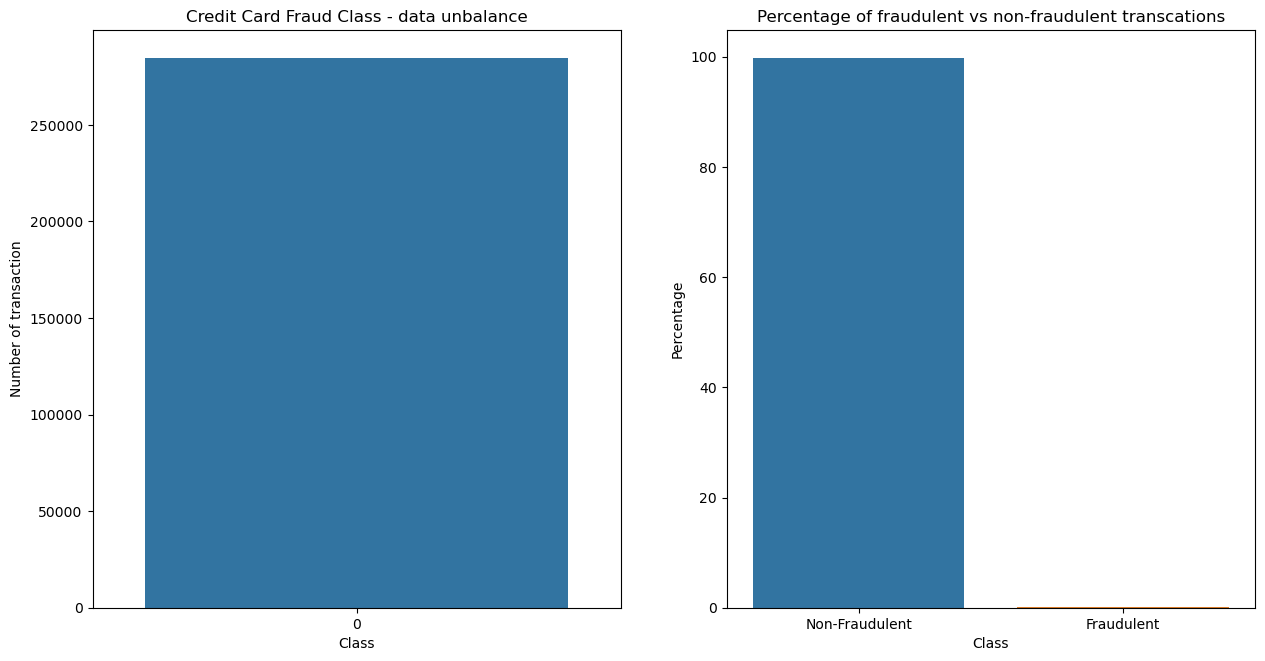

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [14]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [16]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

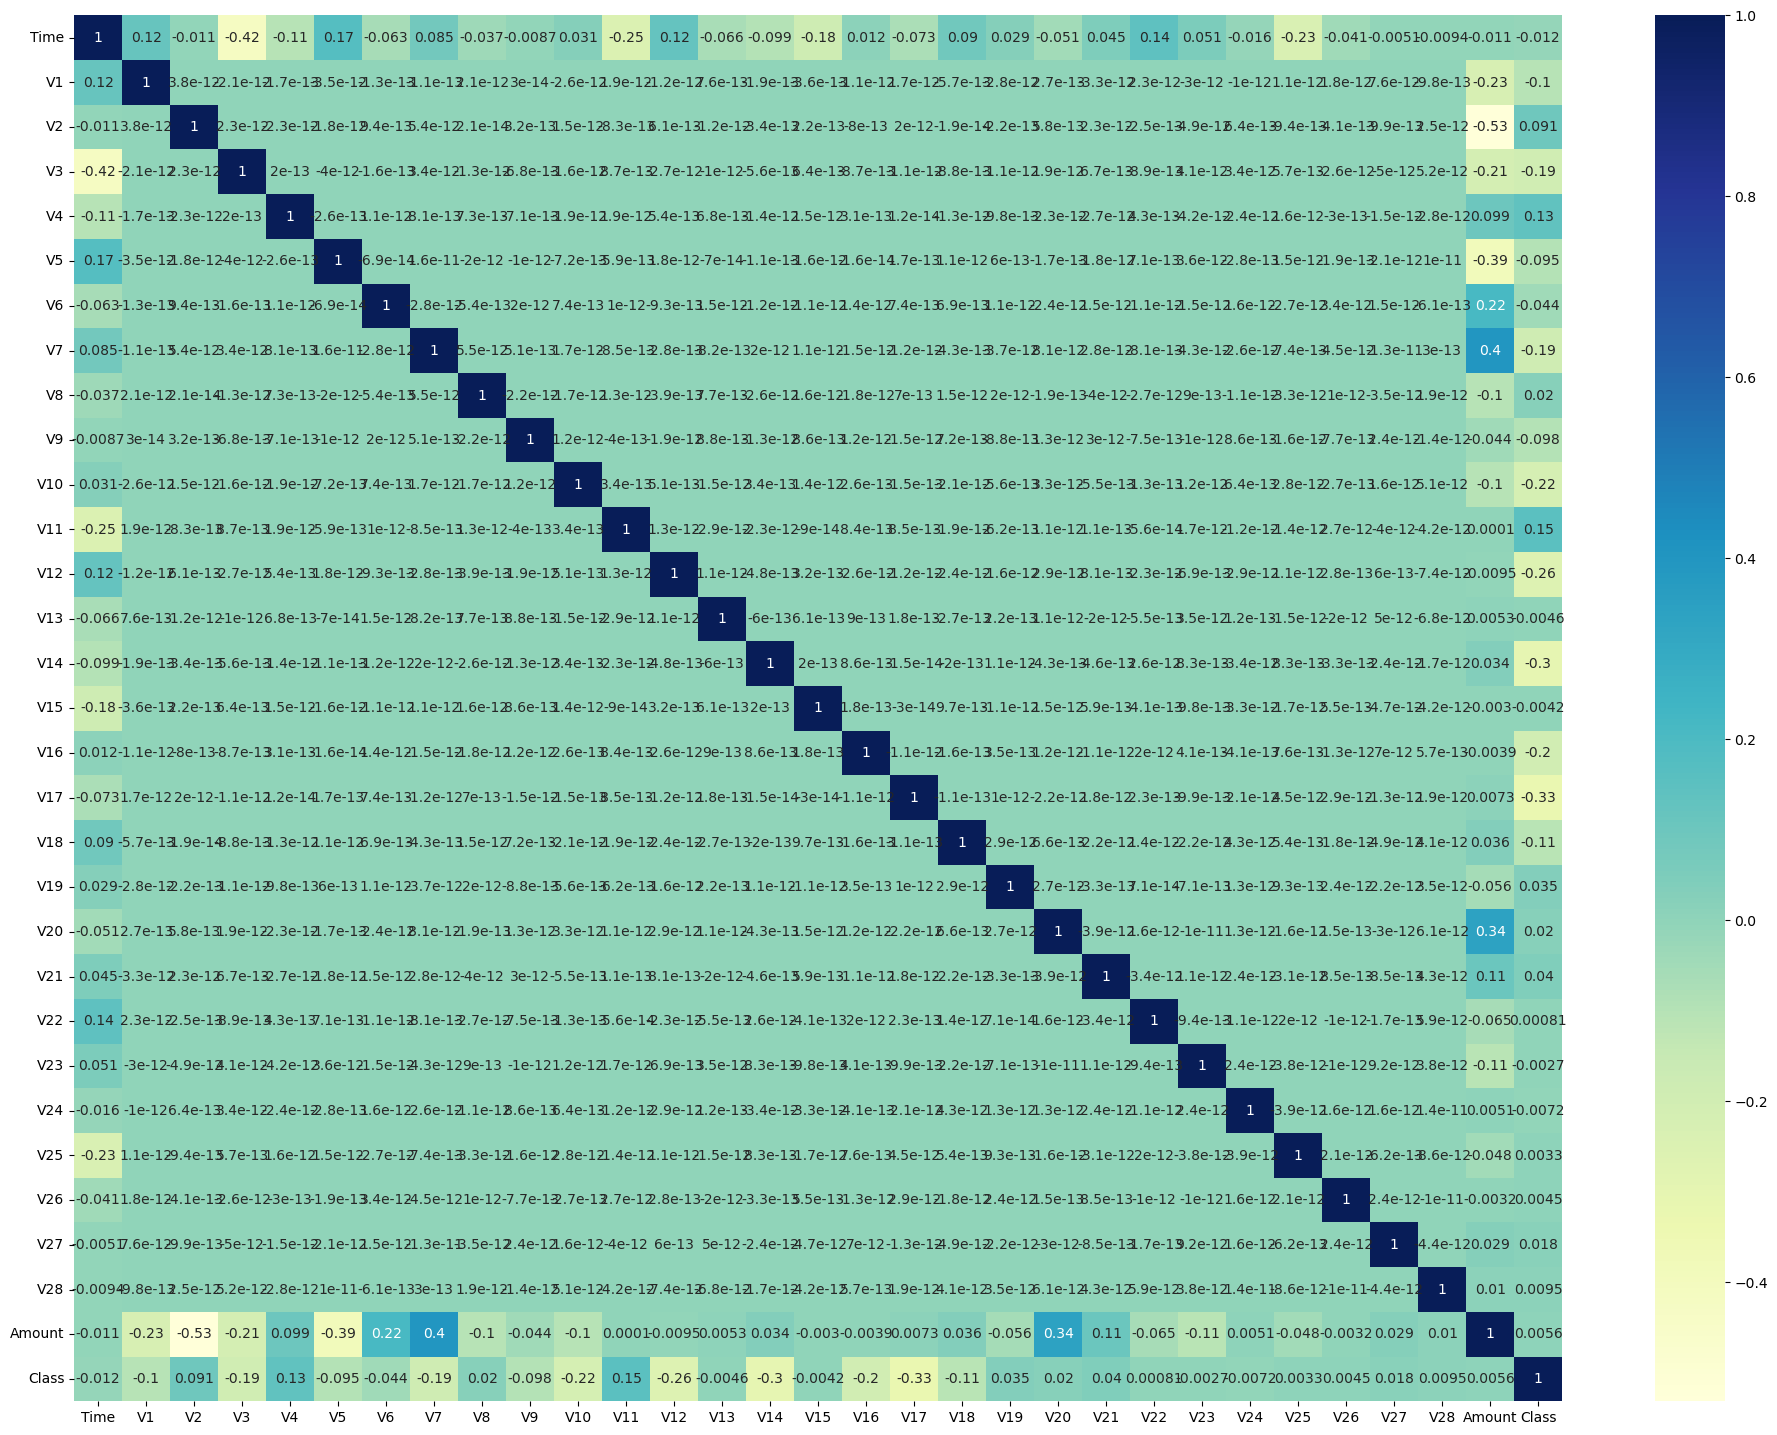

In [18]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [19]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

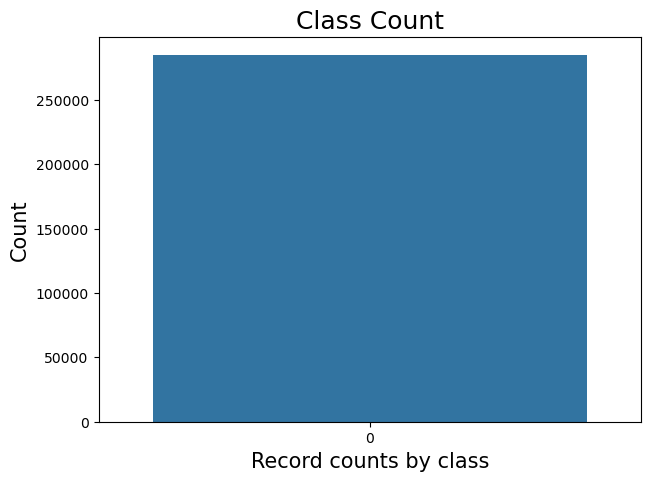

In [20]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

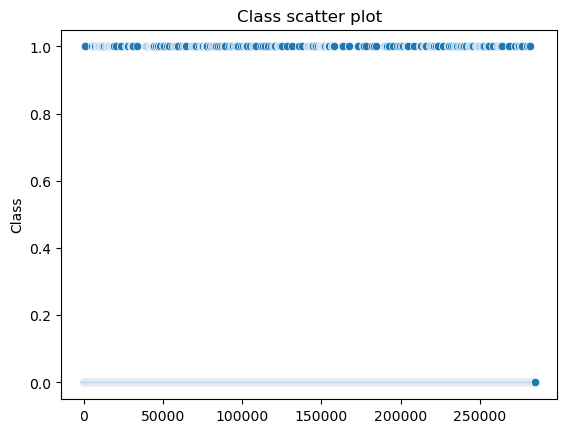

In [22]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Class"])
plt.title("Class scatter plot")
plt.show()

In [24]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [25]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

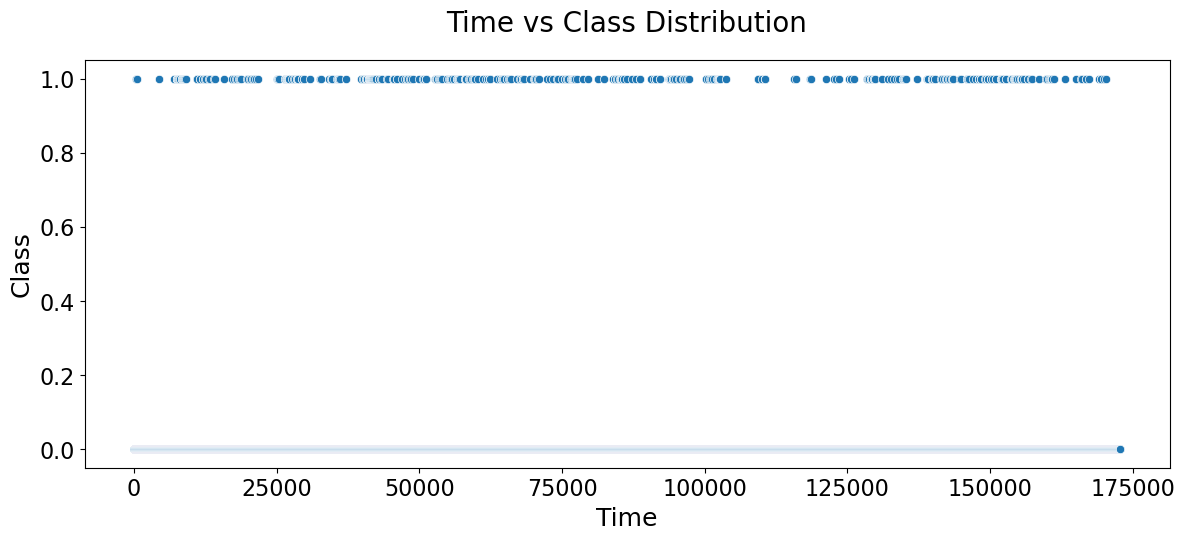

In [26]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

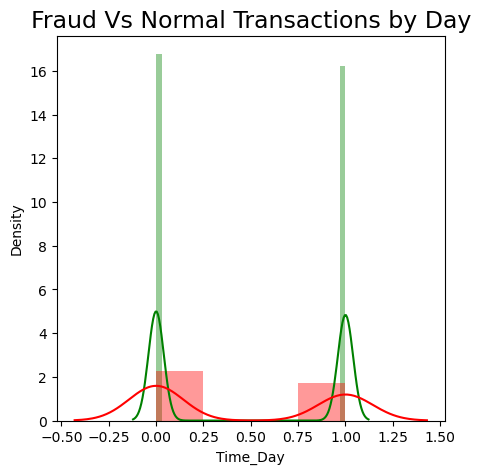

In [27]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

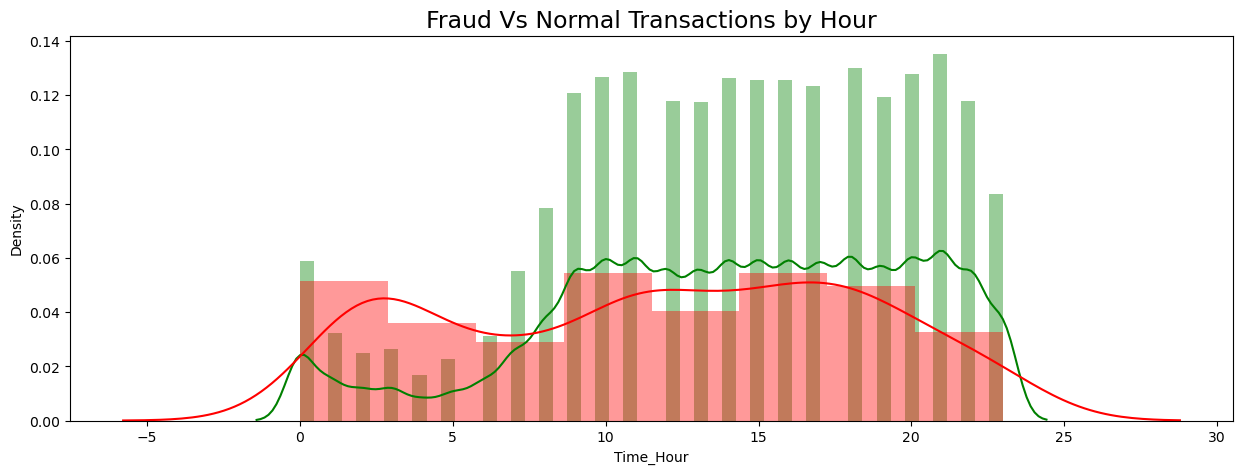

In [28]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

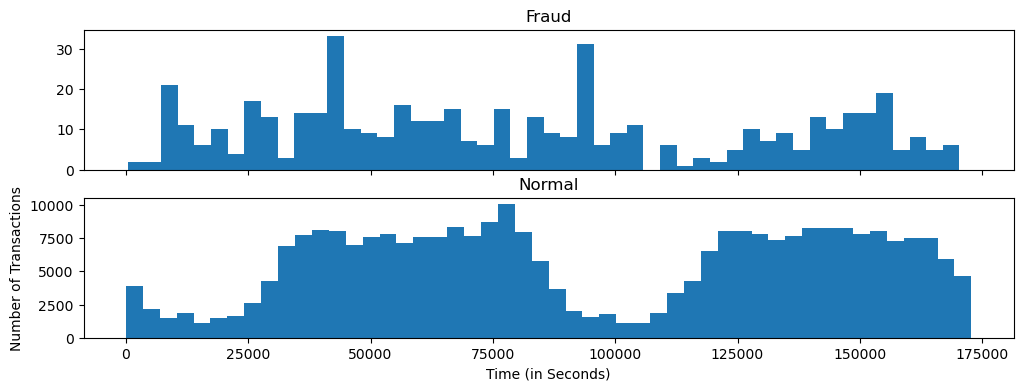

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [30]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [31]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

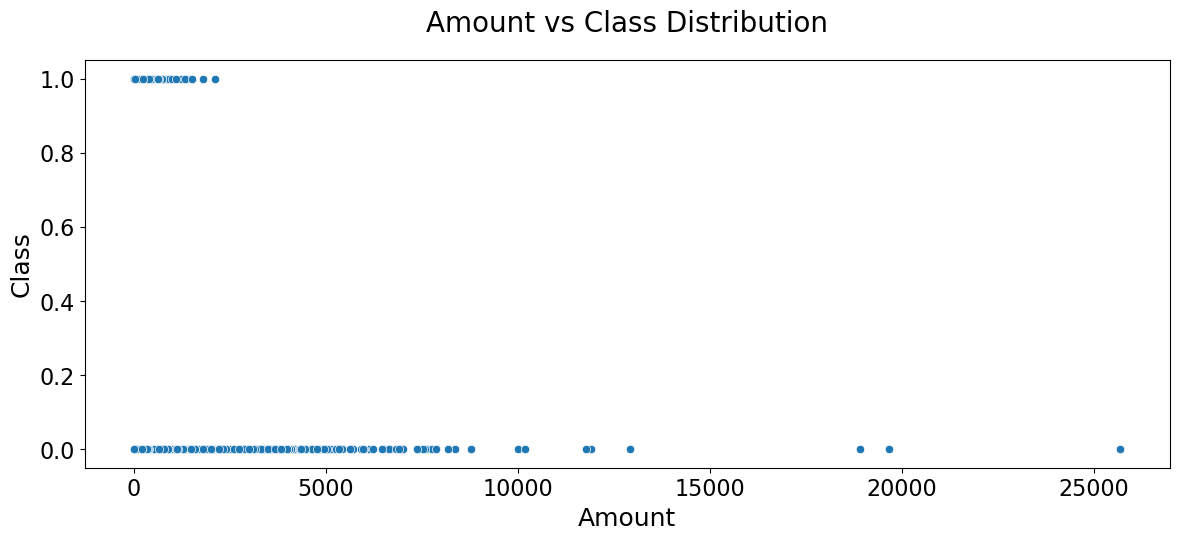

In [37]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

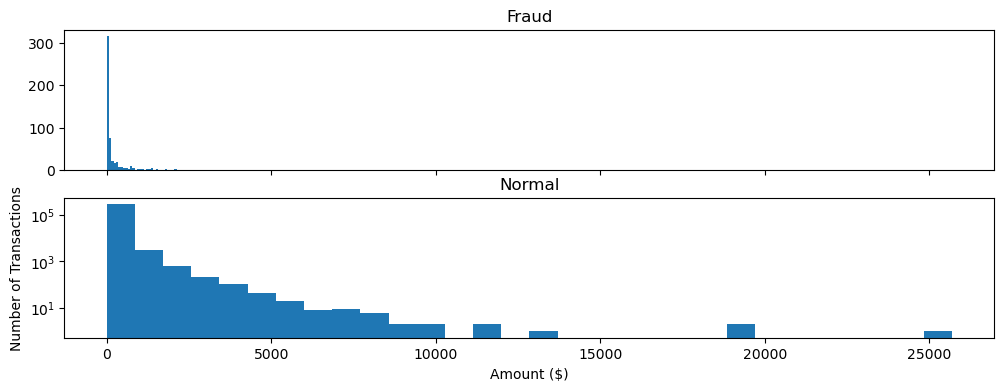

In [38]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [39]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

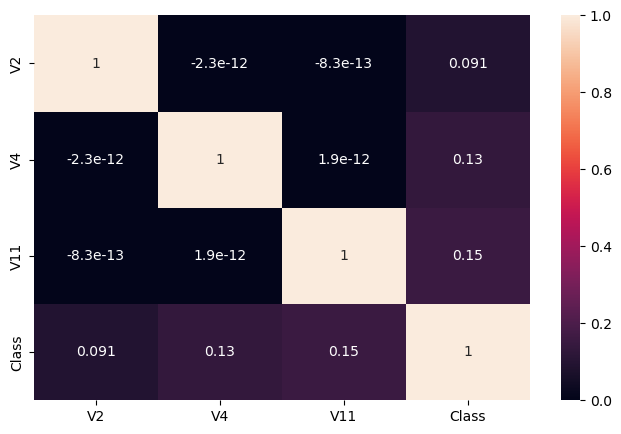

In [40]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

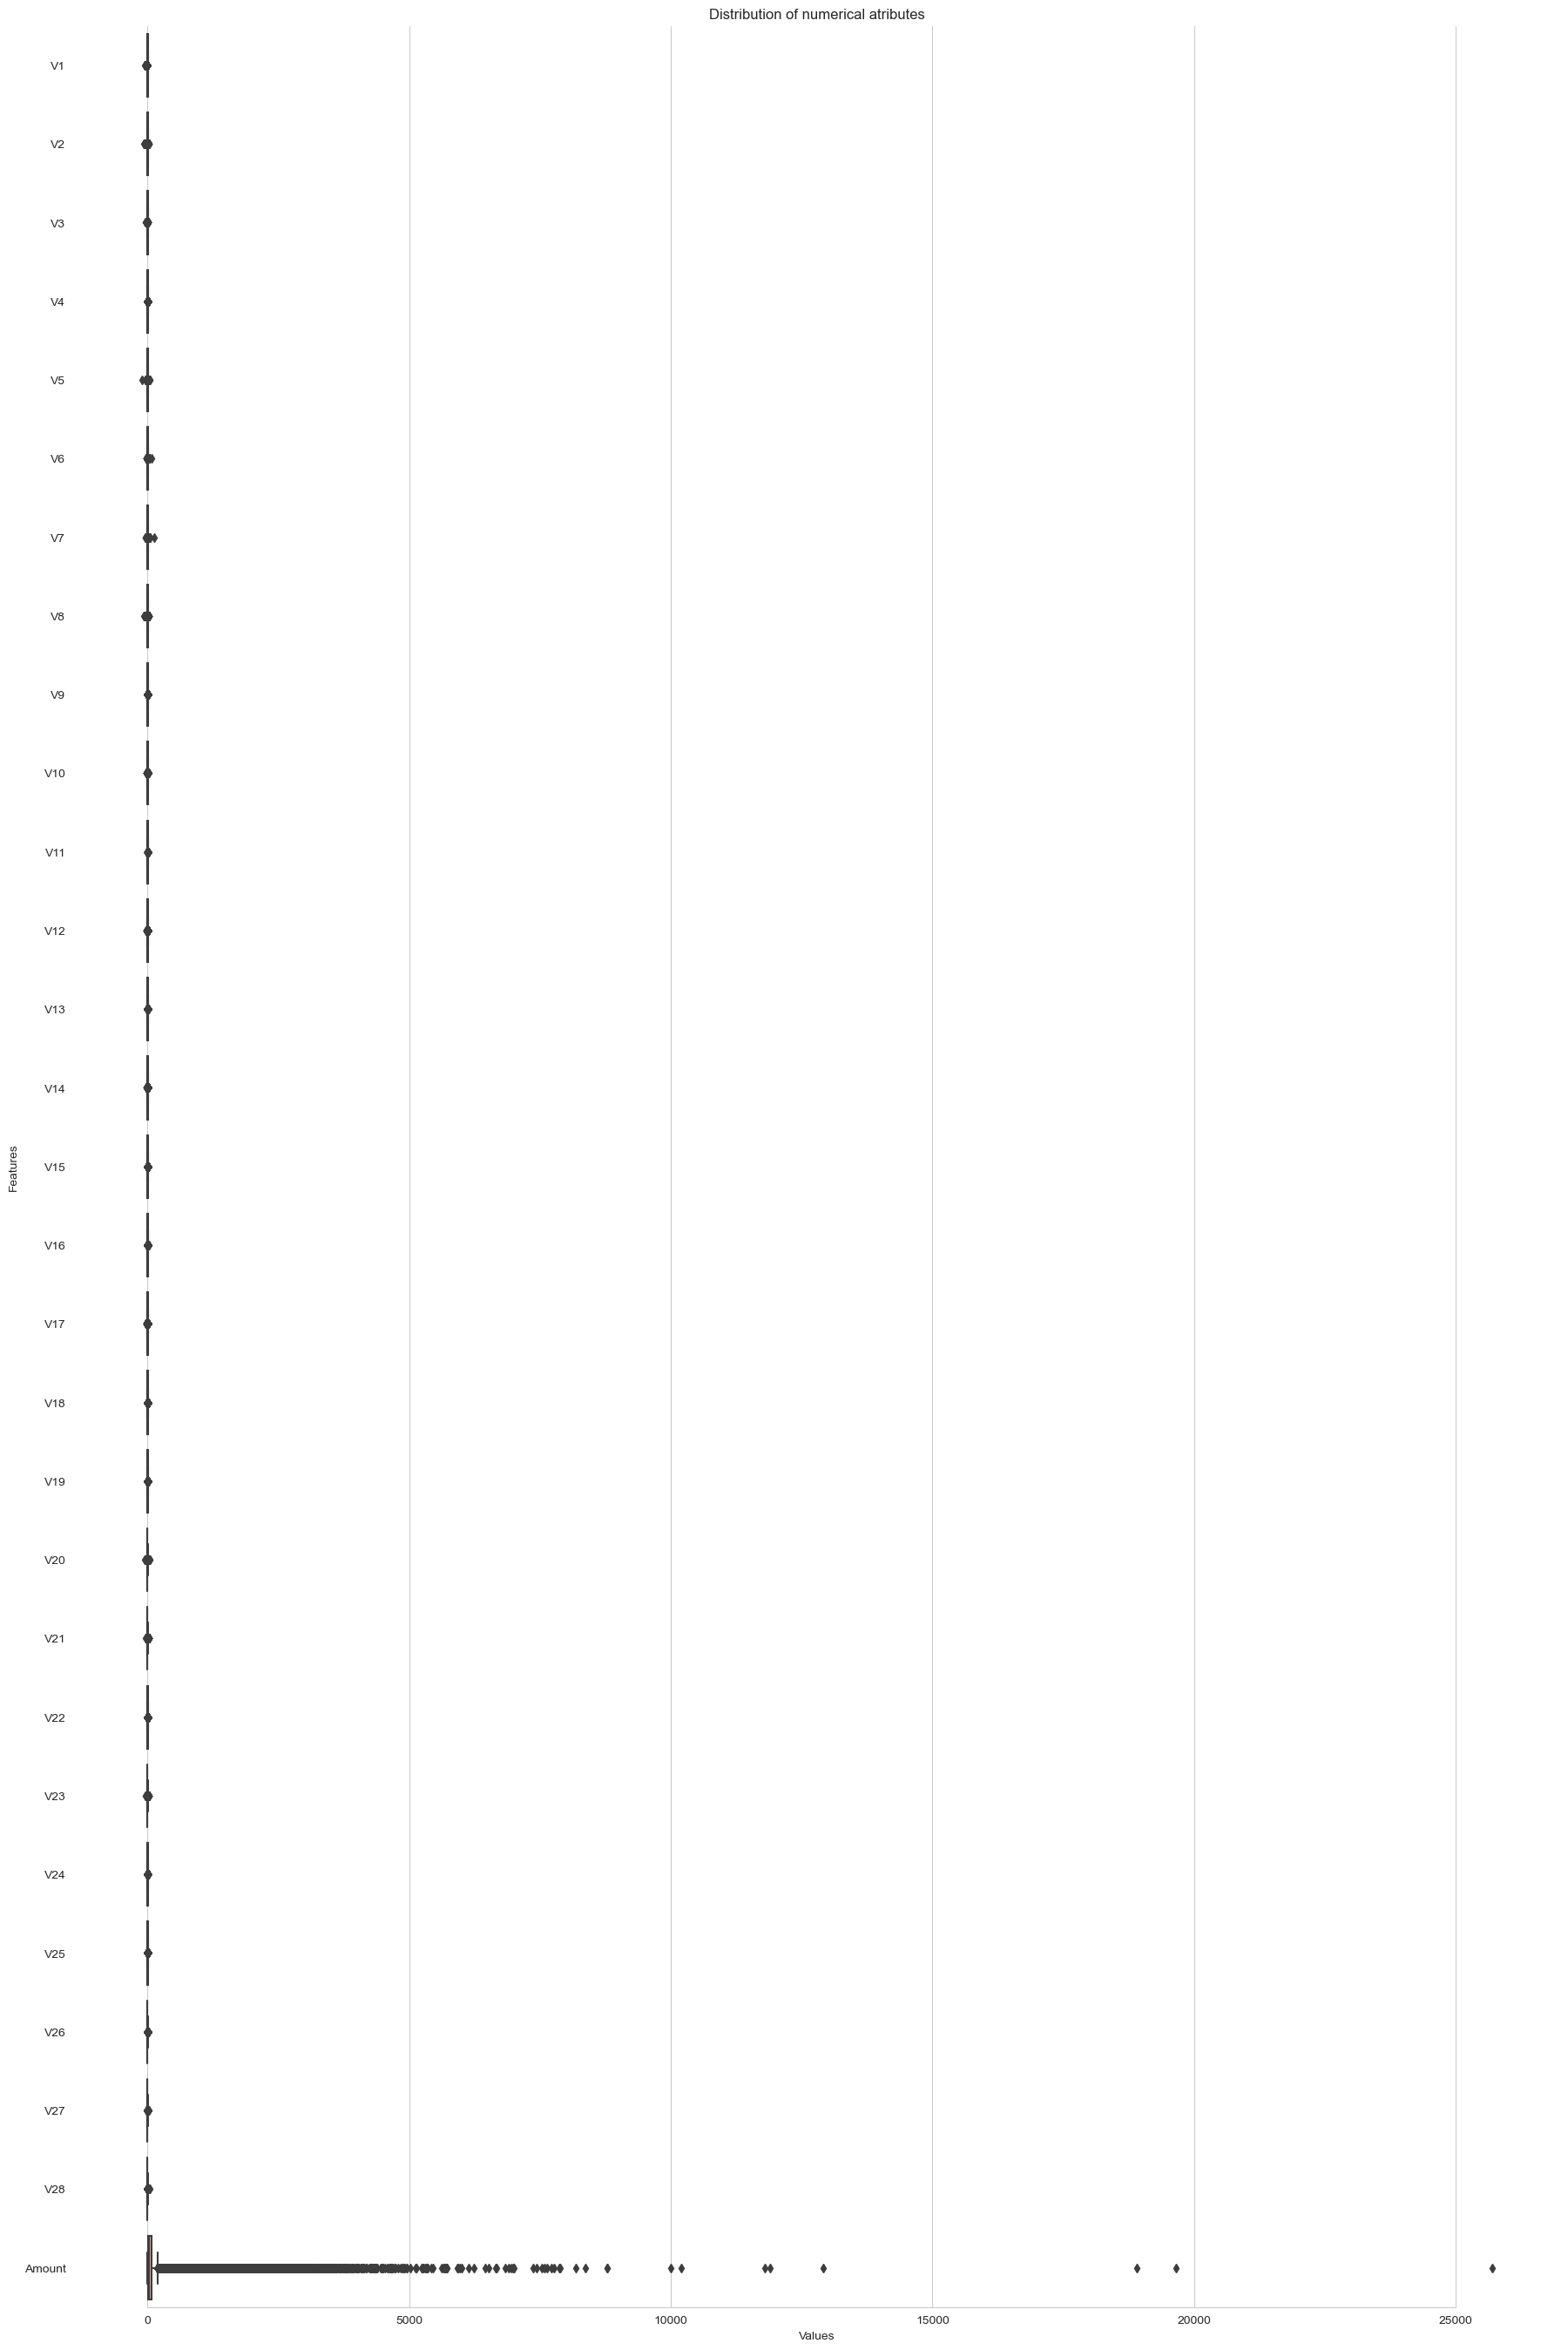

In [41]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

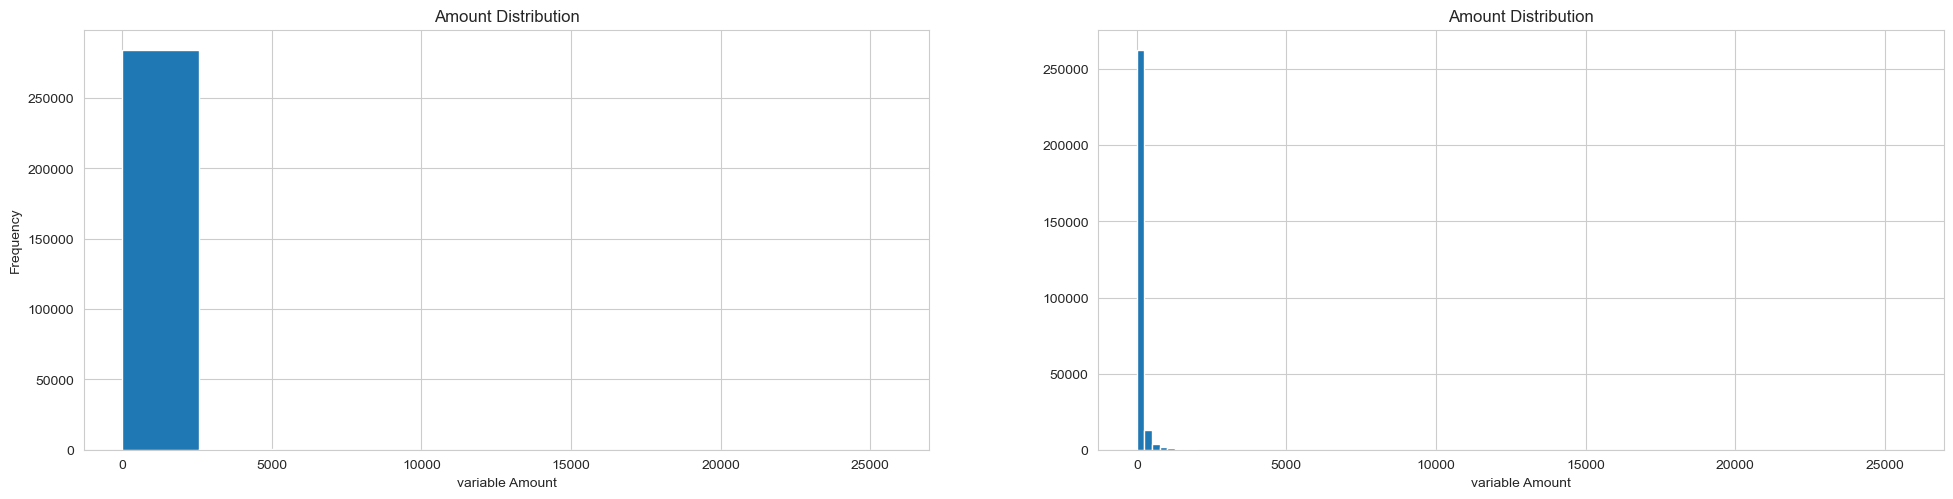

In [44]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

In [45]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [46]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  
0  149.62  
1    2.69  
2  378.66  
3  123.50  
4   69.99

In [47]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [48]:
#Preserve X_test & y_test to evaluate on the test data once you build the model
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [49]:
#Plotting the distribution of a variable
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

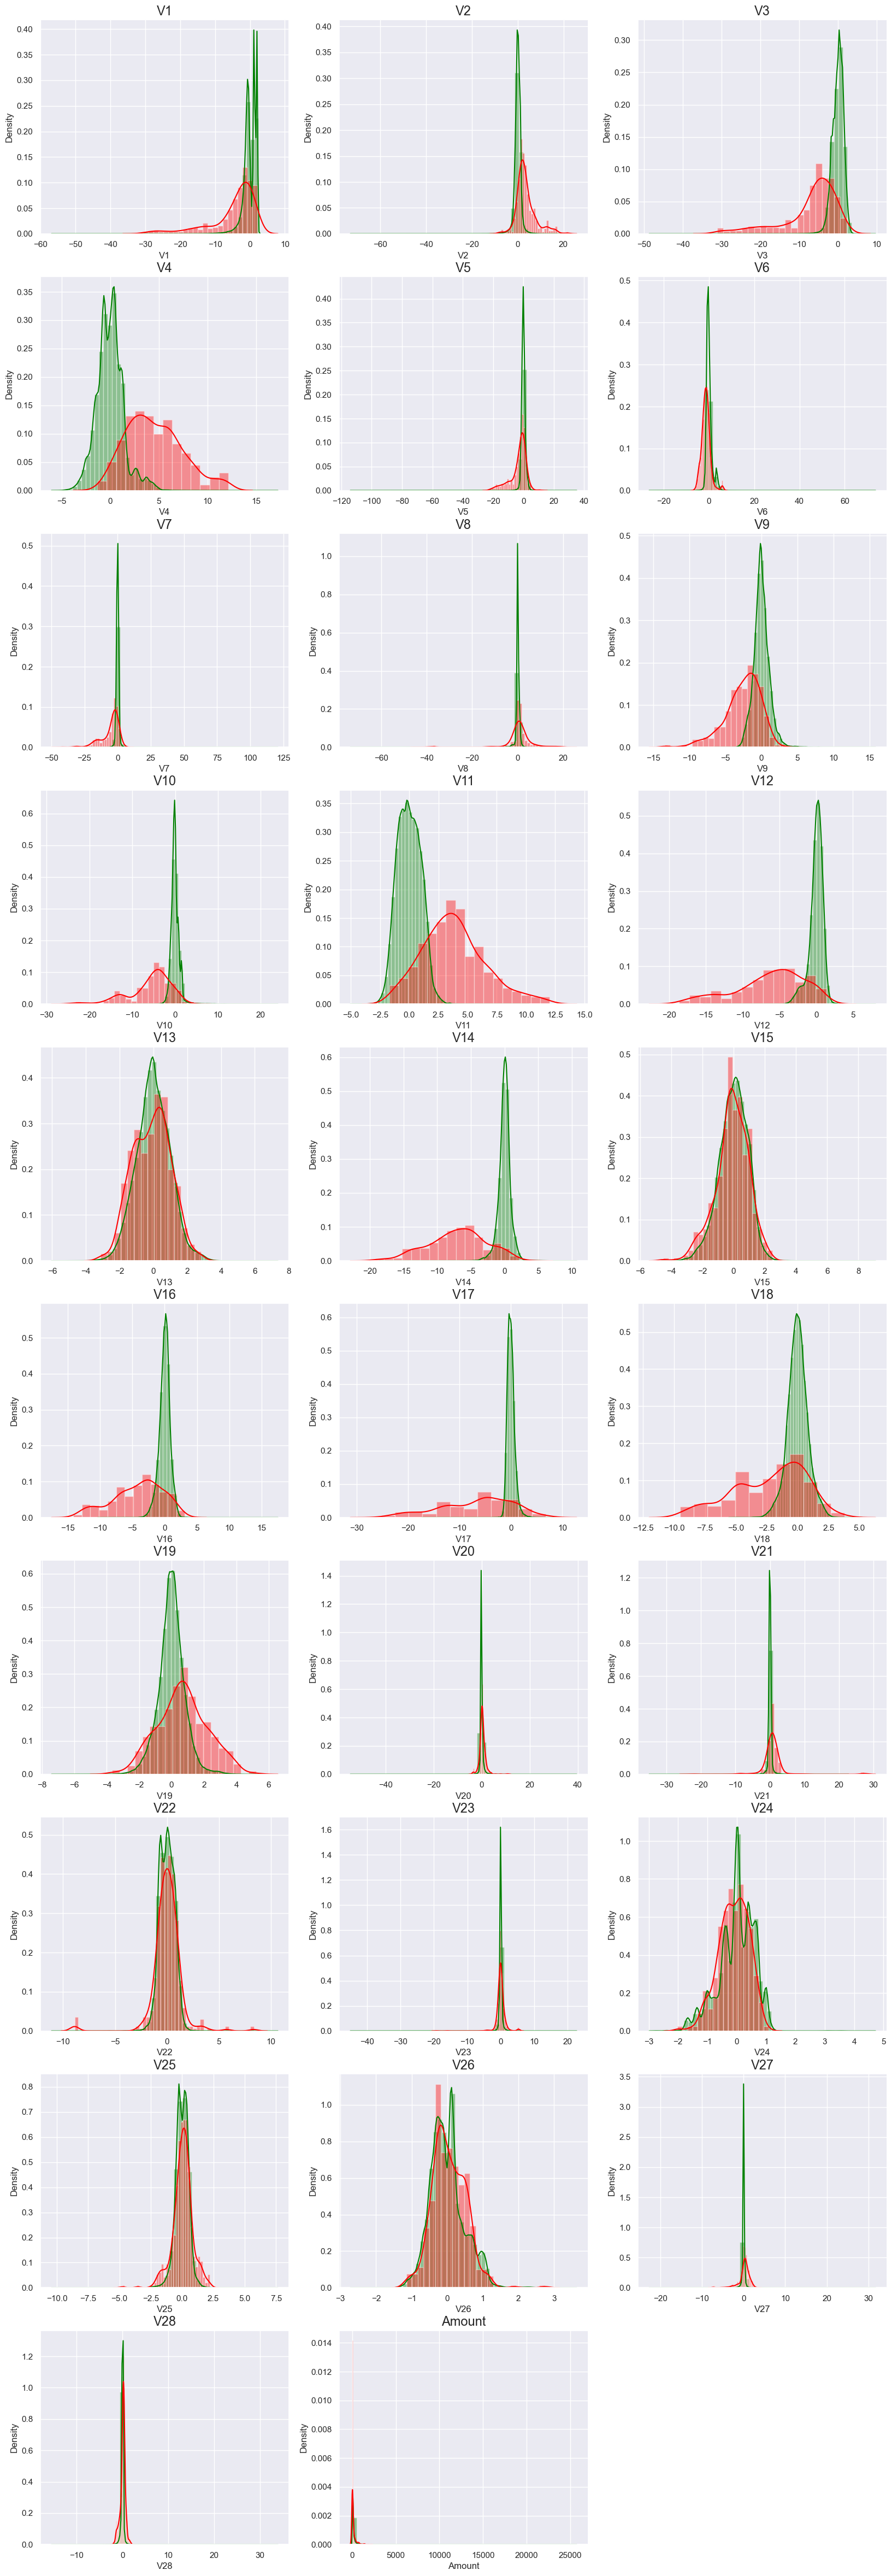

In [50]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [51]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [52]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [53]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [60]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [61]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [62]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
      


In [63]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [64]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [65]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [66]:

#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

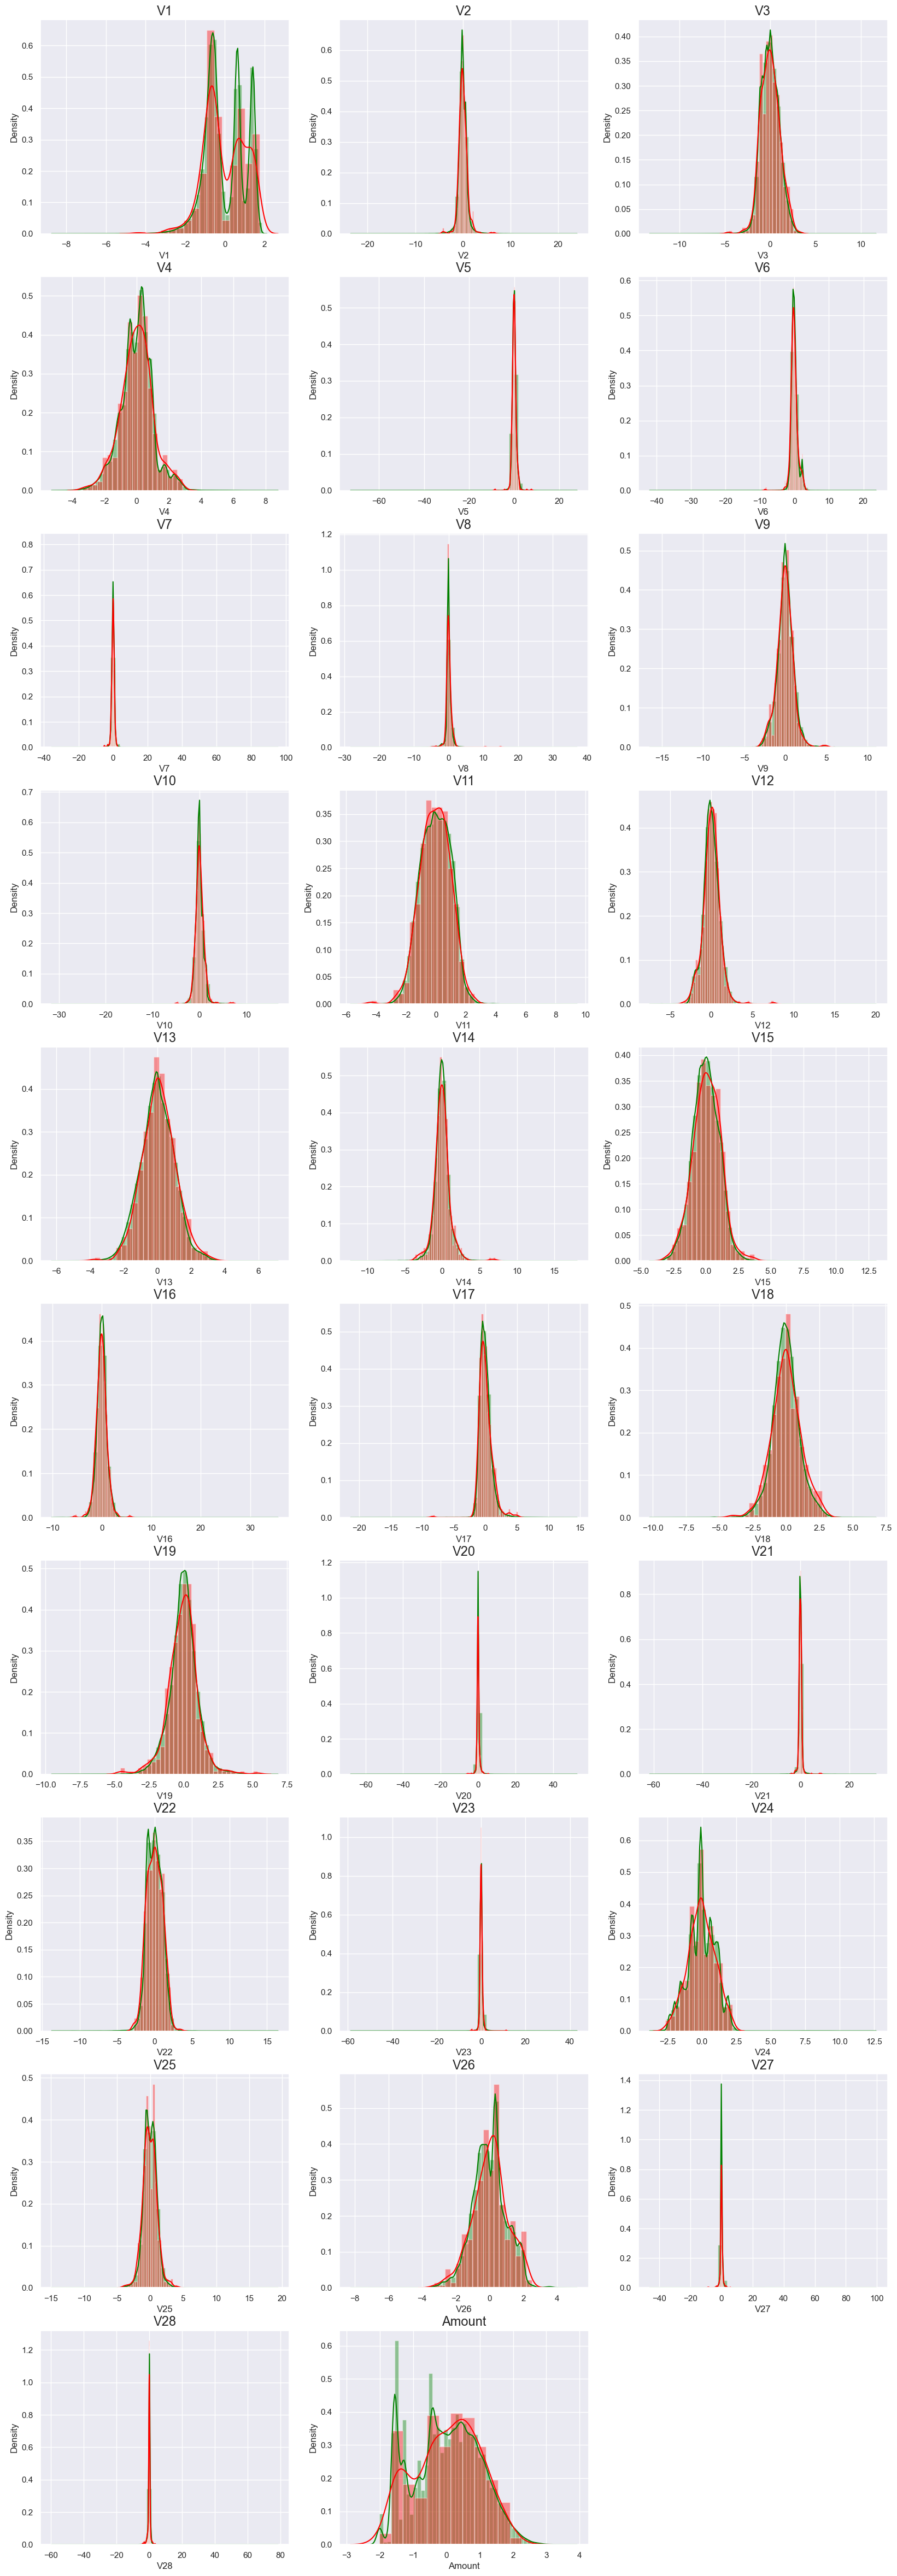

In [67]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

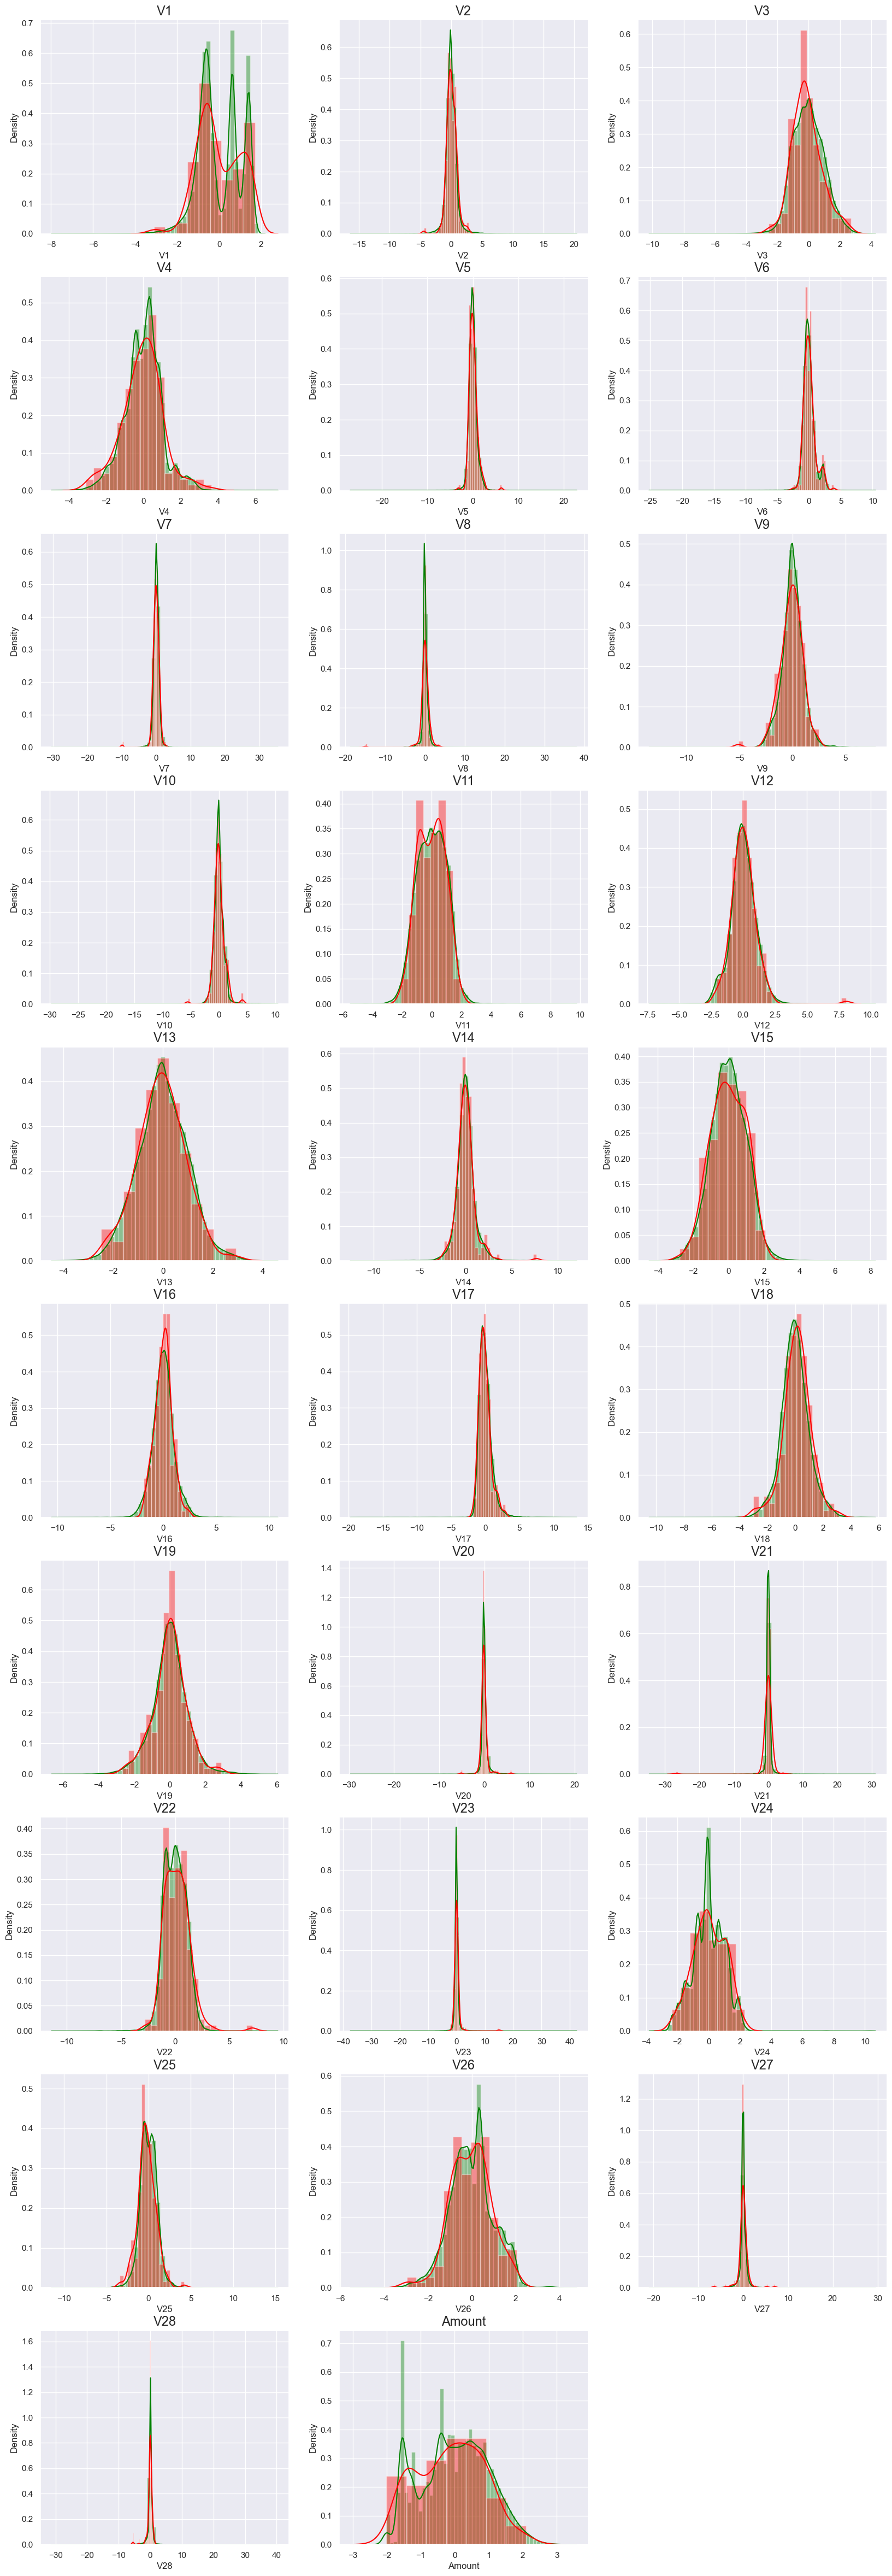

In [68]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [ ]:
df_Results.head()

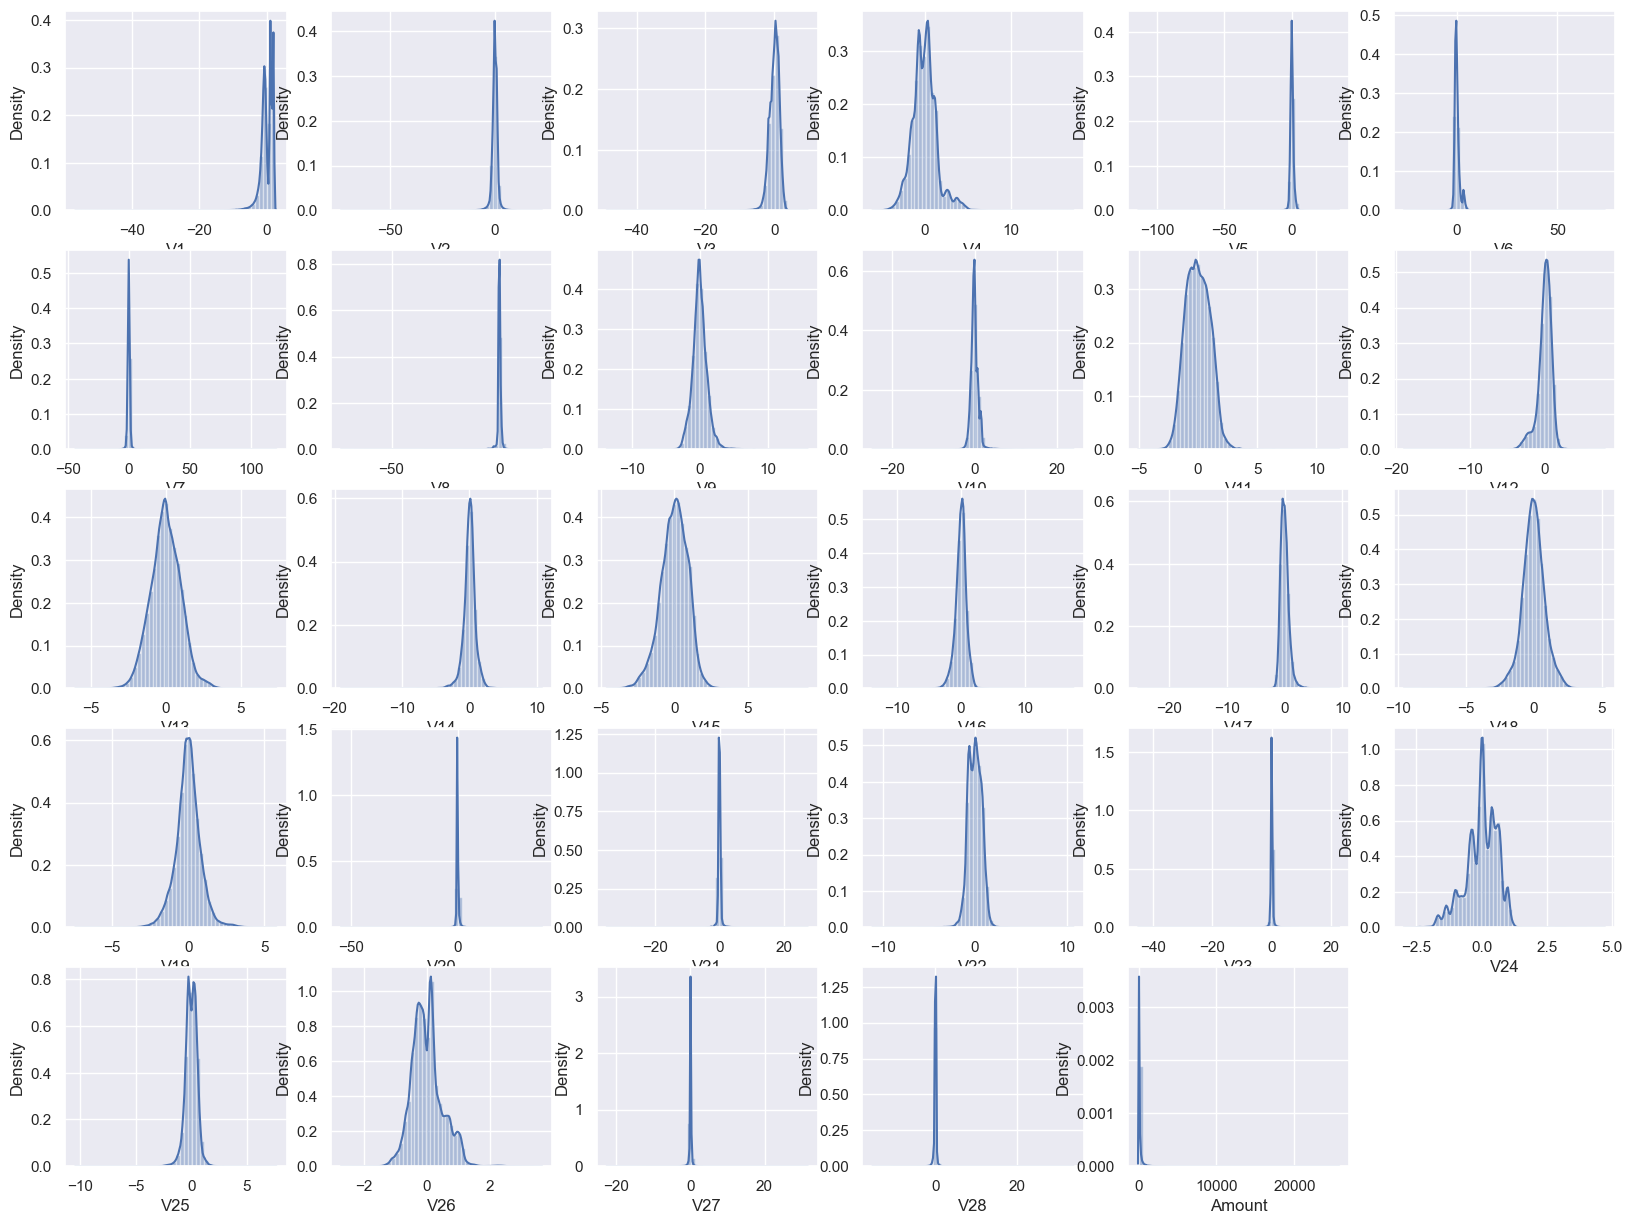

In [73]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [75]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0    0.998262
1    0.001738
Name: count, dtype: float64

In [83]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9779586599034975
Best hyperparameters:  {'C': 0.01}


In [85]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       7.010391      0.283464         0.076157        0.026435    0.01   
1       6.790517      0.622316         0.064364        0.014952     0.1   
2       7.153913      0.378540         0.051368        0.003380       1   
3       7.480325      0.377079         0.059166        0.012553      10   
4       6.843488      0.504006         0.056968        0.004976     100   
5       6.046739      0.874630         0.044776        0.018139    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.987291           0.974950           0.953012   
1   {'C': 0.1}           0.977322           0.967134           0.913275   
2     {'C': 1}           0.958333           0.959004           0.910822   
3    {'C': 10}           0.956233           0.964285           0.913223   
4   {'C': 100}           0.955450           0.965087           0.922590   
5  {'C': 1000}           0.959023           0.962982           0.903488   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.979728           0.994813         0.977959        0.014182   
1           0.952460           0.988331         0.959705        0.026051   
2           0.954506           0.992043         0.954941        0.025889   
3           0.953557           0.986476         0.954755        0.023772   
4           0.948434           0.991545         0.956621        0.022441   
5           0.955945           0.986479         0.953583        0.027259   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.977284            0.980867   
1                2            0.966852            0.957972   
2                4            0.959845            0.952860   
3                5            0.955365            0.960979   
4                3            0.952789            0.957460   
5                6            0.960505            0.956482   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.985306            0.980904            0.973138   
1            0.962276            0.957525            0.951228   
2            0.962233            0.956418            0.960007   
3            0.962775            0.957436            0.950680   
4            0.969793            0.951733            0.957525   
5            0.959988            0.957724            0.955222   

   mean_train_score  std_train_score  
0          0.979500         0.004073  
1          0.959171         0.005213  
2          0.958272         0.003283  
3          0.957447         0.004266  
4          0.957860         0.006418  
5          0.957984         0.002016

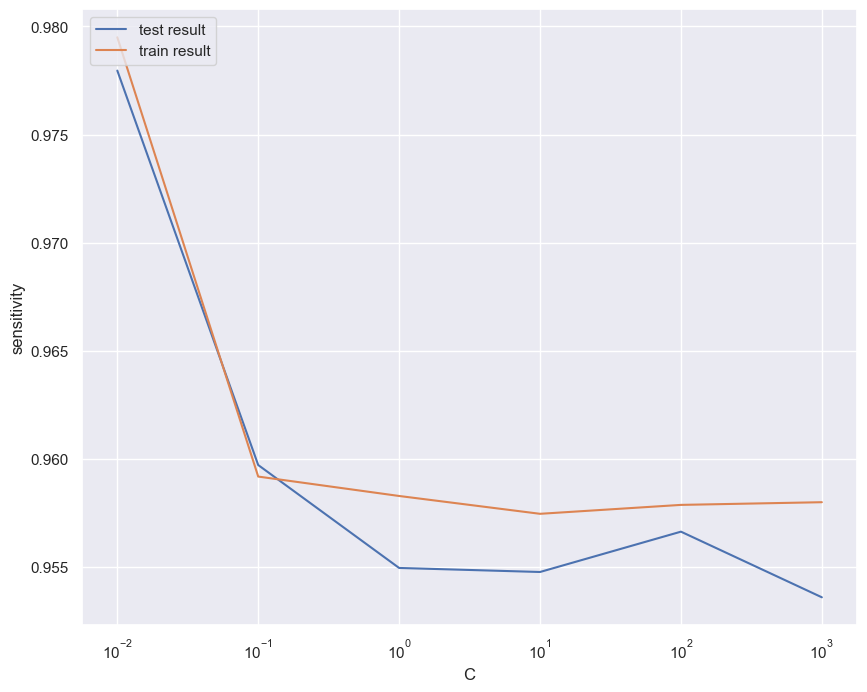

In [86]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [87]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)


LogisticRegression(C=0.01)

In [88]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [89]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [90]:
display_scores(y_train, y_train_pred)

F1 Score: 74.25%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.91      0.63      0.74       396

    accuracy                           1.00    227845
   macro avg       0.96      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [91]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [92]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

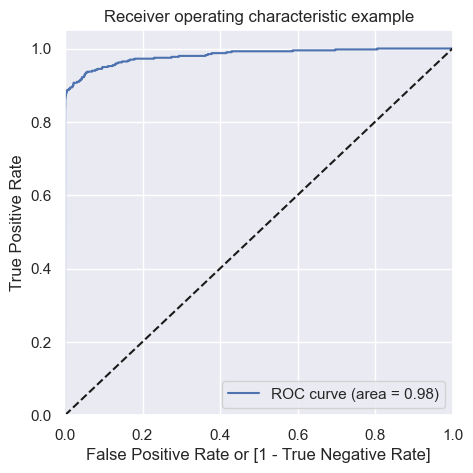

In [93]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [94]:
# Evaluating the model on the test set
## Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 63.35%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.53      0.63        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [95]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

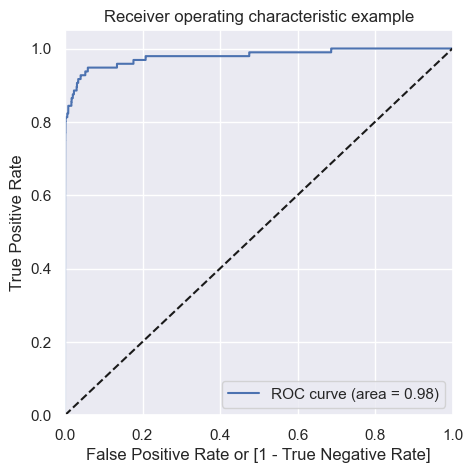

In [96]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [97]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [101]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.087135      0.163943         0.061633        0.004494   
1      15.896911      0.129015         0.070960        0.002942   
2      16.149101      0.370246         0.112602        0.067615   
3      16.355648      0.057175         0.058968        0.000816   
4      45.762169      0.327190         0.059966        0.004543   
5      35.121253      7.451240         0.058301        0.003090   
6      29.651047      0.417491         0.077956        0.016744   
7      28.956778      0.256998         0.065297        0.005732   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933279   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933282   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924929   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.932390   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933443   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933466   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.933180           0.923871         0.930129        0.004426   
1           0.933180           0.923873         0.930130        0.004425   
2           0.936720           0.944598         0.938199        0.004738   
3           0.936720           0.944598         0.938200        0.004737   
4           0.923892           0.938042         0.928954        0.006440   
5           0.916462           0.938010         0.928954        0.009127   
6           0.919684           0.944077         0.932401        0.009986   
7           0.919649           0.944093         0.932403        0.010008   

   rank_test_score  
0                6  
1                5  
2                2  
3                1  
4                7  
5                8  
6                4  
7                3

In [99]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9382001202914115
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [100]:
# Decision Tree with optimal hyperparameters
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [102]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 74.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



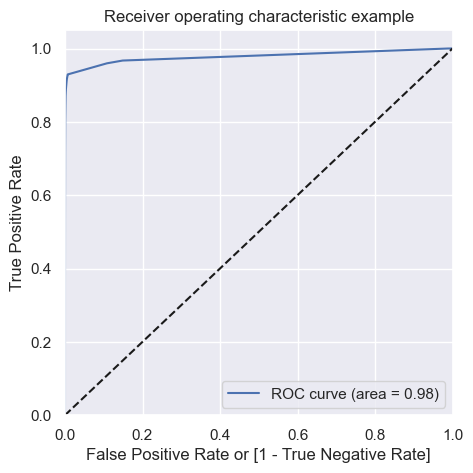

In [103]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [104]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 61.54%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



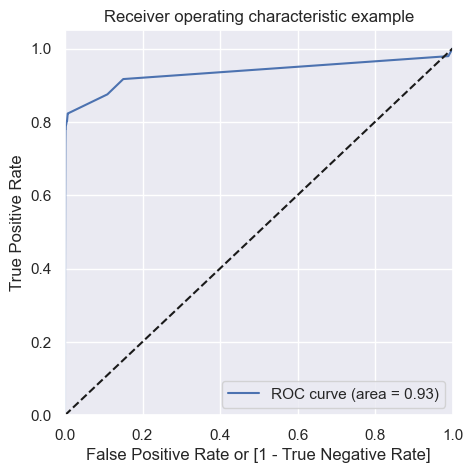

In [105]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [106]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [107]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.005594      0.174525         0.170904        0.004963   
1       4.287215      0.277087         0.171236        0.005309   
2       4.035025      0.359725         0.194224        0.024837   
3       4.473109      0.084997         0.179898        0.005096   
4       4.716636      0.315282         0.177899        0.005351   
5       4.534741      0.282359         0.171569        0.002623   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975585   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.972484   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.974963   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.955029   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.974179   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.968630   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.974595           0.980946         0.977042        0.002790   
1           0.976596           0.978129         0.975736        0.002383   
2           0.972600           0.979148         0.975570        0.002707   
3           0.953863           0.971355         0.960083        0.007985   
4           0.970199           0.974645         0.973008        0.001995   
5           0.972430           0.975082         0.972047        0.002648   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999865            0.999600   
1                2            0.999963            0.999952   
2                3            0.999963            0.999971   
3                6            0.999998            0.999997   
4                4            1.000000            1.000000   
5                5            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999272          0.999579         0.000243  
1            0.999955          0.999957         0.000005  
2            0.999945          0.999960         0.000011  
3            0.999995          0.999997         0.000001  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

In [108]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9770416962049738
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [109]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [110]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [111]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



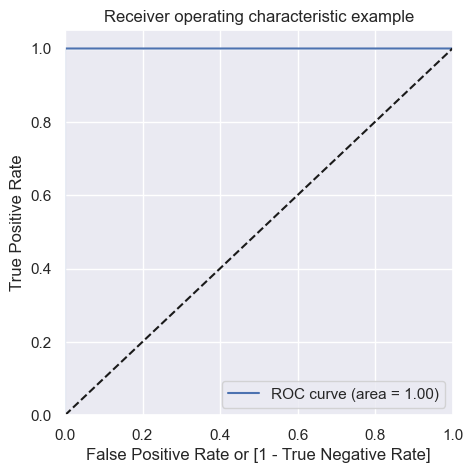

In [112]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [113]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 81.14%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



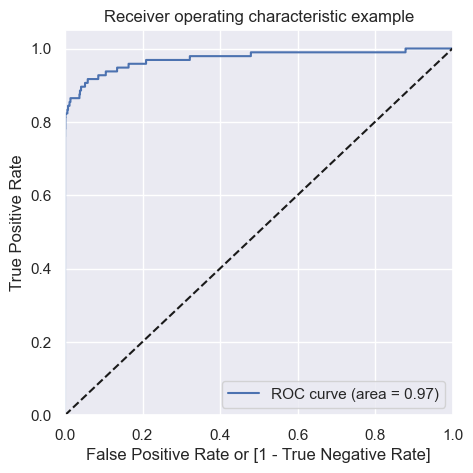

In [126]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [153]:
pip install imbalanced-learn --upgrade

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   ---------------------------------------  235.5/238.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated package

In [169]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()

In [172]:
from sklearn.model_selection import KFold

# Correct initialization of KFold
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Example use in a loop
for train_index, test_index in folds.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f'Fold Accuracy: {acc}')

Fold Accuracy: 0.9993328885923949
Fold Accuracy: 0.9993328885923949
Fold Accuracy: 0.9991748740366215
Fold Accuracy: 0.9989993153210092
Fold Accuracy: 0.9991748740366215


C_values: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Train Scores: [0.9984902016721894, 0.9987886501788497, 0.9988018170247317, 0.999113432377274, 0.999188044503939, 0.9991836555553117, 0.9991836555553117, 0.9991836555553117, 0.9991836555553117, 0.9991836555553117]
Validation Scores: [0.9984199992977775, 0.9986131104947158, 0.9985779993679997, 0.9989993328885924, 0.9989993328885924, 0.9989993328885924, 0.9989993328885924, 0.9989993328885924, 0.9989993328885924, 0.9989993328885924]


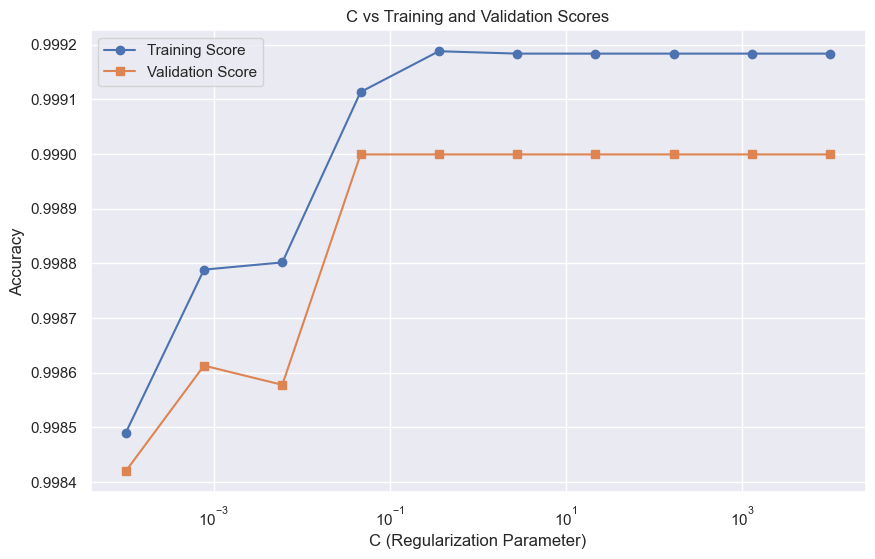

In [186]:
# Preprocess the data (assuming 'Class' is the target variable)
df = pd.read_csv('creditcard.csv')
data=df
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of C values
C_values = np.logspace(-4, 4, 10)
train_scores = []
val_scores = []

# Train the logistic regression model with different C values
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    # Calculate accuracy for training and validation sets
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    val_scores.append(accuracy_score(y_val, model.predict(X_val)))

# Ensure variables are accessible for debugging
print("C_values:", C_values)
print("Train Scores:", train_scores)
print("Validation Scores:", val_scores)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Training Score', marker='o')
plt.plot(C_values, val_scores, label='Validation Score', marker='s')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('C vs Training and Validation Scores')
plt.legend()
plt.grid(True)
plt.show()


In [205]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284802 284805 284806] TEST: [     7     28     34 ... 284799 284803 284804]
TRAIN: [     1      2      3 ... 284803 284804 284806] TEST: [     0      8     13 ... 284789 284795 284805]
TRAIN: [     0      2      7 ... 284804 284805 284806] TEST: [     1      3      4 ... 284751 284767 284790]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2     14     16 ... 284796 284800 284802]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     9     11     12 ... 284794 284801 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7     11     13 ... 284796 284798 284799]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5      6 ... 284800 284801 284803]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4     10     14 ... 284789 284790 284802]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     8     16     18 ... 284771 284787 284791]
TRAIN: [     3     

In [207]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

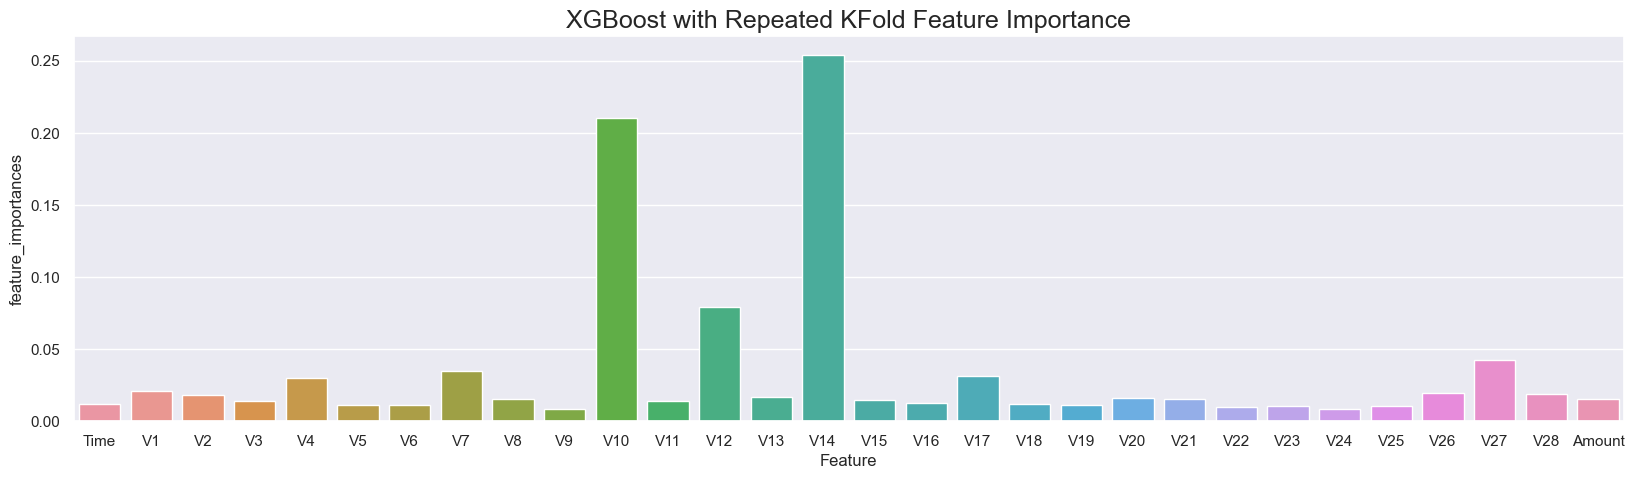

In [208]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()


In [209]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


In [215]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

NameError: name 'X_over' is not defined

In [216]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

NameError: name 'X_over' is not defined

In [217]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

NotFittedError: need to call fit or load_model beforehand

In [218]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

NameError: name 'XGB_probs' is not defined